In [9]:
import sys, os
sys.path.append("../")
import embedding as emb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [22]:
## import train and test data
train = pd.read_csv('../data/train_2021-12-24.csv')

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99586 entries, 0 to 99585
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sale_Price          99586 non-null  float64
 1   Odometer            99561 non-null  float64
 2   Power               99532 non-null  float64
 3   Fuel_Urban          88160 non-null  float64
 4   Make_Code           99586 non-null  object 
 5   Family_Code         99586 non-null  object 
 6   Year_Group          99586 non-null  int64  
 7   Region_Description  99586 non-null  object 
 8   Vehicle_Code        99586 non-null  int64  
 9   inventory_days      99586 non-null  int64  
 10  age_list_day        99586 non-null  int64  
 11  age_sell_day        99586 non-null  int64  
 12  sld_wknum           99586 non-null  int64  
 13  adv_wknum           99586 non-null  int64  
 14  km_per_day          99561 non-null  float64
 15  fuel_per_power      88160 non-null  float64
 16  odo_

In [24]:
train.select_dtypes('object').columns

Index(['Make_Code', 'Family_Code', 'Region_Description'], dtype='object')

In [15]:
cat_cols = ['Make_Code', 'Family_Code', 'Region_Description']


embedding_info = emb.get_embedding_info(train,categorical_variables=cat_cols,max_n=2)
embedding_info

{'Make_Code': (62, 2), 'Family_Code': (570, 2), 'Region_Description': (7, 2)}

In [16]:
X_encoded, encoders = emb.get_label_encoded_data(train.loc[:,['Make_Code', 'Family_Code', 'Region_Description']])
X_encoded.head()

,Make_Code,Family_Code,Region_Description
0,58,408,6
1,43,367,4
2,15,480,3
3,25,502,6
4,21,133,0


In [40]:
!pip freeze > requirements.txt

In [17]:
y_train = train.Sale_Price

In [18]:
y_train.shape

(99144,)

In [19]:
# ce.get_embeddings trains NN, extracts embeddings and return a dictionary containing the embeddings
embeddings = emb.get_embeddings(X_encoded, y_train, categorical_embedding_info=embedding_info, 
                               is_classification=False, epochs=100,batch_size=256)

Epoch: 0 - loss: 477496000.000, r2: -1.698:  99%|█████████▉| 78848/79315 [00:08<00:00, 10335.94it/s]
Epoch: 0 - loss: 475623791.227, r2: -0.905, val_loss: 382451835.665, val_r2: 0.152: 100%|██████████| 79315/79315 [00:09<00:00, 8788.73it/s]
Epoch: 1 - loss: 155195648.000, r2: 0.365:  99%|█████████▉| 78336/79315 [00:07<00:00, 11272.61it/s]
Epoch: 1 - loss: 155202863.558, r2: 0.428, val_loss: 288017131.247, val_r2: 0.380: 100%|██████████| 79315/79315 [00:07<00:00, 9966.16it/s]
Epoch: 2 - loss: 126072744.000, r2: 0.514:  99%|█████████▉| 78592/79315 [00:07<00:00, 10561.86it/s]
Epoch: 2 - loss: 126030473.645, r2: 0.537, val_loss: 260785877.623, val_r2: 0.436: 100%|██████████| 79315/79315 [00:08<00:00, 9807.71it/s]
Epoch: 3 - loss: 116869288.000, r2: 0.560:  99%|█████████▉| 78592/79315 [00:07<00:00, 10984.74it/s]
Epoch: 3 - loss: 116963816.218, r2: 0.566, val_loss: 241971667.492, val_r2: 0.473: 100%|██████████| 79315/79315 [00:08<00:00, 9300.20it/s]
Epoch: 4 - loss: 111862056.000, r2: 0.581:

In [20]:
dfs = emb.get_embeddings_in_dataframe(embeddings=embeddings, encoders=encoders)

100%|██████████| 3/3 [00:00<00:00, 804.59it/s]


In [21]:
dfs.keys()

dict_keys(['Make_Code', 'Family_Code', 'Region_Description'])

In [25]:
def label_point(x, y, df, ax):
    for i, point in df.iterrows():
        ax.text(point[x]+.02, point[y], str(i))

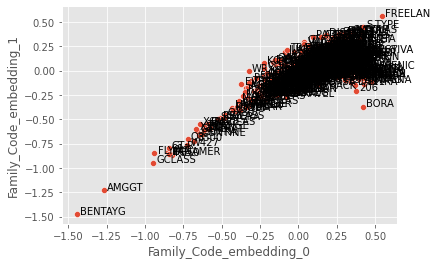

In [45]:
prefix = 'Family_Code'
x,y = 0,1

fig, ax = plt.subplots()

ax = sns.scatterplot(
    x=f'{prefix}_embedding_{x}',
    y=f'{prefix}_embedding_{y}', 
    data=dfs[prefix], legend='auto')

label_point(f'{prefix}_embedding_{x}', 
            f'{prefix}_embedding_{y}',
            dfs[prefix], ax)

plt.show()
fig.savefig(f'../nbs/{prefix}_enc.png')

In [29]:
from sklearn.decomposition import PCA

In [30]:
# save embeddings

df = dfs['Make_Code']

In [31]:
n_dict = dict()

for i in range(df.shape[1]+1):
    pca = PCA(n_components=i)
    pca.fit(df)
    n_dict[i] = pca.explained_variance_ratio_

In [32]:
print(pca.explained_variance_ratio_)

[0.9421599  0.05784009]


In [33]:
n_dict

{0: array([], dtype=float32),
 1: array([0.9421599], dtype=float32),
 2: array([0.9421599 , 0.05784009], dtype=float32)}

In [35]:
import pickle

with open('../data/embeddings.pkl', 'wb') as handle:
    pickle.dump(dfs, handle)
    
with open('../data/encoders.pkl', 'wb') as handle:
    pickle.dump(encoders, handle)

In [37]:
with open('../data/embeddings.pkl', 'rb') as handle:
    embeds = pickle.load(handle)
    
with open('../data/encoders.pkl', 'rb') as handle:
    encs = pickle.load(handle)

In [38]:
ll -h ../data/

total 52M
-rw-r--r-- 1 root  16K Aug 29 06:37 embeddings.pkl
-rw-r--r-- 1 root 9.0K Aug 29 06:37 encoders.pkl
-rw-r--r-- 1 root  13M Aug 21 14:14 saleprice_dataset.csv
-rw-r--r-- 1 root  21M Aug 21 14:17 sales.csv
-rw-r--r-- 1 root 2.8M Aug 29 06:17 test_2022-08-08.csv
-rw-r--r-- 1 root  16M Aug 29 06:17 train_2021-12-24.csv


In [39]:
encoders

{'Make_Code': __LabelEncoder__(),
 'Family_Code': __LabelEncoder__(),
 'Region_Description': __LabelEncoder__()}